In [3]:
import pandas as pd
df = pd.read_csv("/content/unsw_nb15_custom.csv")
df.head()


,src_ip,dst_ip,src_port,dst_port,protocol,packet_size,timestamp,attack_type,label
0,192.168.1.220,10.0.0.67,35394,546,TCP,937,2023-01-09 21:52:58,Normal,0
1,192.168.1.223,10.0.0.109,47755,118,ICMP,756,2023-01-16 04:13:46,Normal,0
2,192.168.1.90,10.0.0.93,44100,342,ICMP,170,2023-01-09 11:42:10,Normal,0
3,192.168.1.76,10.0.0.100,47398,313,TCP,163,2023-01-18 03:19:06,Normal,0
4,192.168.1.104,10.0.0.101,42147,585,UDP,600,2023-01-14 20:28:20,Normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   src_ip       5000 non-null   object
 1   dst_ip       5000 non-null   object
 2   src_port     5000 non-null   int64 
 3   dst_port     5000 non-null   int64 
 4   protocol     5000 non-null   object
 5   packet_size  5000 non-null   int64 
 6   timestamp    5000 non-null   object
 7   attack_type  5000 non-null   object
 8   label        5000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 351.7+ KB


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].head()


,timestamp
0,2023-01-09 21:52:58
1,2023-01-16 04:13:46
2,2023-01-09 11:42:10
3,2023-01-18 03:19:06
4,2023-01-14 20:28:20


In [8]:
# Hour of the day (0-23)
df['hour'] = df['timestamp'].dt.hour

# Day of the week
df['day'] = df['timestamp'].dt.day_name()
df.head()


,src_ip,dst_ip,src_port,dst_port,protocol,packet_size,timestamp,attack_type,label,hour,day
0,192.168.1.220,10.0.0.67,35394,546,TCP,937,2023-01-09 21:52:58,Normal,0,21,Monday
1,192.168.1.223,10.0.0.109,47755,118,ICMP,756,2023-01-16 04:13:46,Normal,0,4,Monday
2,192.168.1.90,10.0.0.93,44100,342,ICMP,170,2023-01-09 11:42:10,Normal,0,11,Monday
3,192.168.1.76,10.0.0.100,47398,313,TCP,163,2023-01-18 03:19:06,Normal,0,3,Wednesday
4,192.168.1.104,10.0.0.101,42147,585,UDP,600,2023-01-14 20:28:20,Normal,0,20,Saturday


In [9]:
#✅ STEP 4 — Exploratory Data Analysis (EDA)
# How many normal vs attack traffic (label)

traffic_count = df['label'].value_counts()
print(traffic_count)

label
0    3457
1    1543
Name: count, dtype: int64


In [10]:
#how many Attack types distribution (attack_type)

attack_distribution = df['attack_type'].value_counts()
print(attack_distribution)


attack_type
Normal            3457
DoS                197
Exploits           190
Generic            188
Analysis           170
Backdoor           167
Reconnaissance     166
Worms              162
Fuzzers            153
Shellcode          150
Name: count, dtype: int64


In [12]:
#Attacks by hour (hour)

attacks_by_hour = df[df['label'] == 1]['hour'].value_counts().sort_index()
print(attacks_by_hour)


hour
0     62
1     67
2     58
3     66
4     65
5     57
6     70
7     53
8     70
9     67
10    61
11    68
12    58
13    65
14    72
15    56
16    56
17    58
18    71
19    78
20    54
21    63
22    72
23    76
Name: count, dtype: int64


In [14]:
# Count attacks by protocol
attacks_by_protocol = df[df['label'] == 1]['protocol'].value_counts()
print(attacks_by_protocol)



protocol
UDP     524
TCP     520
ICMP    499
Name: count, dtype: int64


In [ ]:
#Packet size analysis
# Basic stats of packet size
packet_stats = df['packet_size'].describe()
print(packet_stats)


In [ ]:
#Data Visualization
#I will be  use Matplotlib and Seaborn (Python libraries) for this.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#  make plots look nicer
sns.set(style="whitegrid")


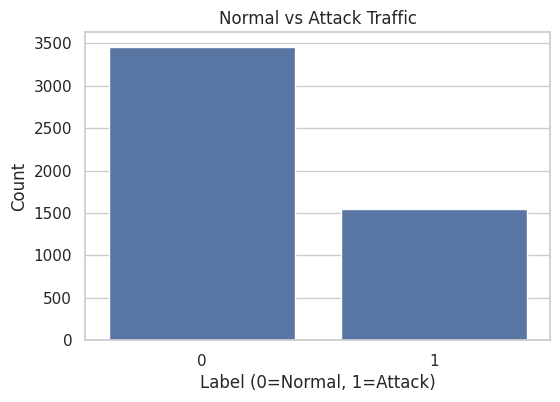

In [16]:
#Visualize Normal vs Attack Traffic

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Normal vs Attack Traffic')
plt.xlabel('Label (0=Normal, 1=Attack)')
plt.ylabel('Count')
plt.show()


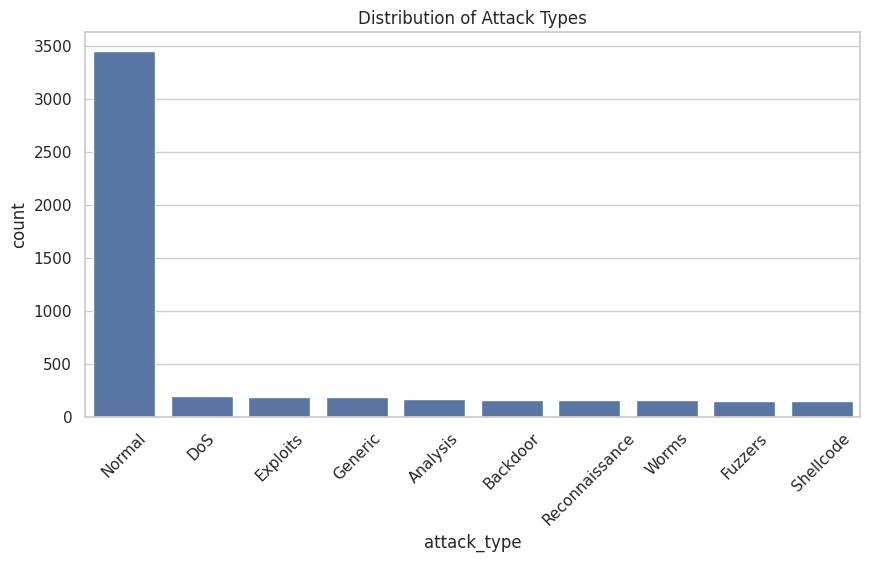

In [17]:
#Attack Type Distribution

plt.figure(figsize=(10,5))
sns.countplot(x='attack_type', data=df, order=df['attack_type'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Attack Types')
plt.show()



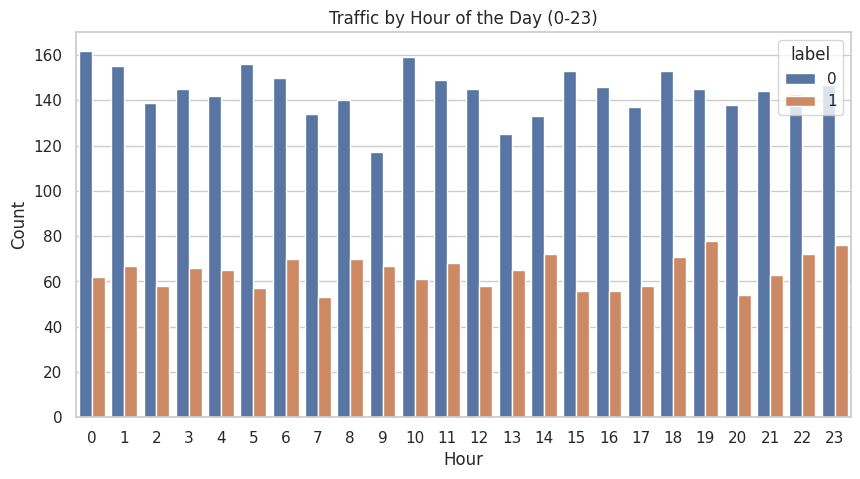

In [18]:
# Attacks by Hour
plt.figure(figsize=(10,5))
sns.countplot(x='hour', hue='label', data=df)
plt.title('Traffic by Hour of the Day (0-23)')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

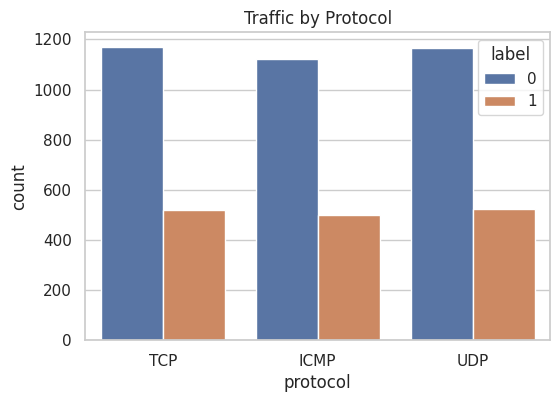

In [19]:
#Attacks by Protocol

plt.figure(figsize=(6,4))
sns.countplot(x='protocol', hue='label', data=df)
plt.title('Traffic by Protocol')
plt.show()

In [25]:
#Building a Simple Anomaly Detection Model

from sklearn.ensemble import IsolationForest
features = ['src_port', 'dst_port', 'packet_size', 'hour']
X = df[features]
# Create model
iso = IsolationForest(contamination=0.05, random_state=42)  # 5% expected anomalies

# Fit model
iso.fit(X)

# Predict anomalies
df['anomaly'] = iso.predict(X)








In [26]:
# Convert to 0/1 for easier understanding
df['anomaly'] = df['anomaly'].apply(lambda x: 0 if x == 1 else 1)

In [29]:
# Checking how many anomalies detected
df['anomaly'].value_counts()


,count
anomaly,
0,4750
1,250


In [30]:
#Compare with actual attacks
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(df['label'], df['anomaly']))
print(classification_report(df['label'], df['anomaly']))


[[3288  169]
 [1462   81]]
              precision    recall  f1-score   support

           0       0.69      0.95      0.80      3457
           1       0.32      0.05      0.09      1543

    accuracy                           0.67      5000
   macro avg       0.51      0.50      0.45      5000
weighted avg       0.58      0.67      0.58      5000



In [ ]:
#Visualize Anomalies / Suspicious Traffic

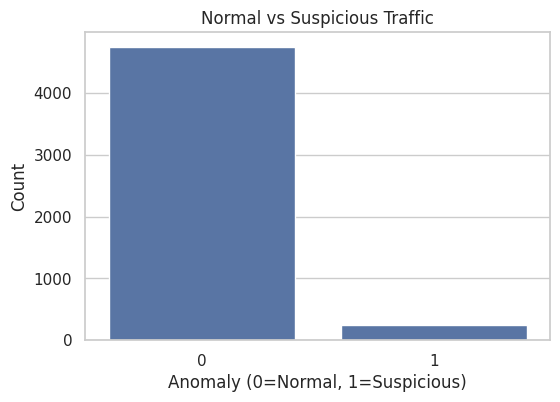

In [31]:
#Number of normal vs suspicious traffic

plt.figure(figsize=(6,4))
sns.countplot(x='anomaly', data=df)
plt.title('Normal vs Suspicious Traffic')
plt.xlabel('Anomaly (0=Normal, 1=Suspicious)')
plt.ylabel('Count')
plt.show()

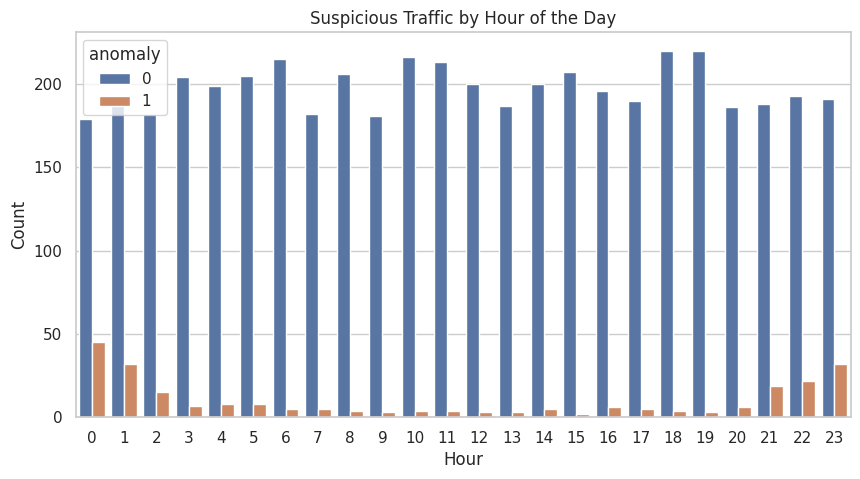

In [32]:
#Anomalies by Hour

plt.figure(figsize=(10,5))
sns.countplot(x='hour', hue='anomaly', data=df)
plt.title('Suspicious Traffic by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

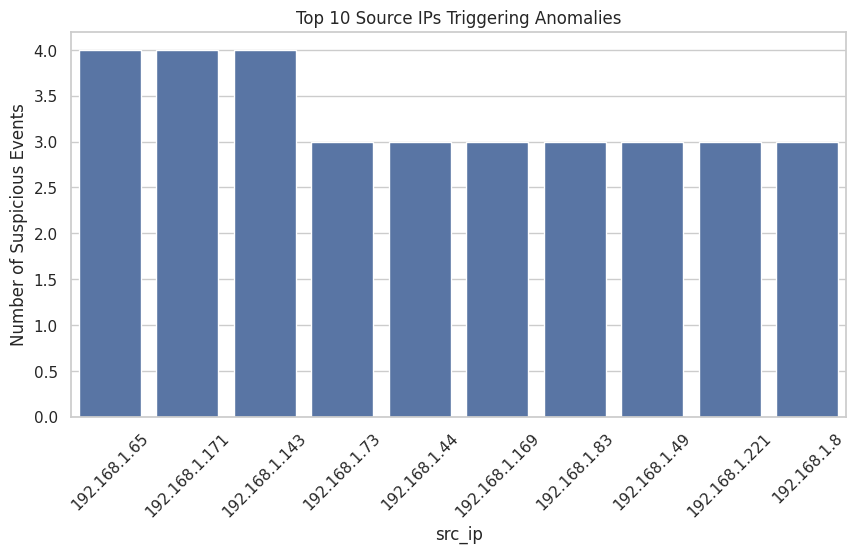

In [33]:
#Top source IPs triggering anomalies

top_ips = df[df['anomaly']==1]['src_ip'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_ips.index, y=top_ips.values)
plt.xticks(rotation=45)
plt.title('Top 10 Source IPs Triggering Anomalies')
plt.ylabel('Number of Suspicious Events')
plt.show()

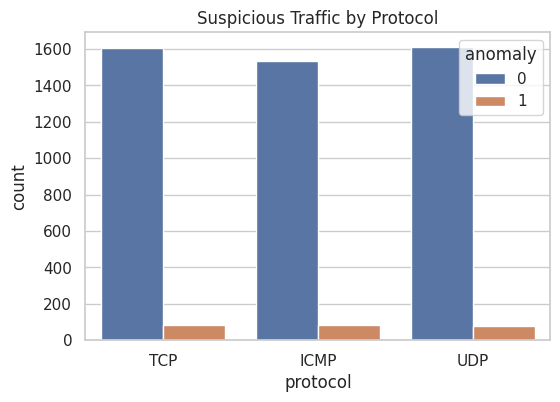

In [34]:
#Anomalies by Protocol

plt.figure(figsize=(6,4))
sns.countplot(x='protocol', hue='anomaly', data=df)
plt.title('Suspicious Traffic by Protocol')
plt.show()

In [ ]:
#Final Report & Dashboard Summary

In [35]:
print("Total traffic:", len(df))
print("\nNormal vs Suspicious Traffic:\n", df['anomaly'].value_counts())
print("\nTop Attack Types:\n", df['attack_type'].value_counts())
print("\nTop 10 Suspicious Source IPs:\n", df[df['anomaly']==1]['src_ip'].value_counts().head(10))
print("\nSuspicious Traffic by Protocol:\n", df[df['anomaly']==1]['protocol'].value_counts())


Total traffic: 5000

Normal vs Suspicious Traffic:
 anomaly
0    4750
1     250
Name: count, dtype: int64

Top Attack Types:
 attack_type
Normal            3457
DoS                197
Exploits           190
Generic            188
Analysis           170
Backdoor           167
Reconnaissance     166
Worms              162
Fuzzers            153
Shellcode          150
Name: count, dtype: int64

Top 10 Suspicious Source IPs:
 src_ip
192.168.1.65     4
192.168.1.171    4
192.168.1.143    4
192.168.1.73     3
192.168.1.44     3
192.168.1.169    3
192.168.1.83     3
192.168.1.49     3
192.168.1.221    3
192.168.1.8      3
Name: count, dtype: int64

Suspicious Traffic by Protocol:
 protocol
ICMP    86
TCP     85
UDP     79
Name: count, dtype: int64


In [36]:
df.to_csv("unsw_nb15_with_anomalies.csv", index=False)
